# INSAID Hiring Exercise

## Important: Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    
    
    

- Try to break the codes in the **simplest form** and use number of code block with **proper comments** to them
- We are providing **h** different dataset to choose from(Note: You need to select any one of the dataset from this sample sheet only)
- The **interview calls** will be made solely based on how good you apply the **concepts**.
- Good Luck! Happy Coding!

### Importing the data

In [2]:
# use these links to do so:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Understanding the data

In [6]:
# CHECKING WHETHER THERE ARE ANY NULL VALUES

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# DATAFRAME INFORMATION

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [8]:
# CHECKING THE CHURN RATIO  IF THE DATASET IS IMBALANCE OR NOT

df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [9]:
# CHECKING THE CATEGORICAL FEATURES

df_cat=df.select_dtypes(exclude=['number', 'float', 'bool'])
df_cat.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [10]:
# CHECKING THE NUMERICAL FEATURES

df_num=df.select_dtypes(exclude=['object', 'bool'])
df_num.head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


In [11]:
# CHECKING DATATYPES OF FEATURES 

print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [12]:
# THERE ARE ENTRIES IN 'TOTAL-CHARGES COLUMN' THAT ARE BLANK SPACES & DATATYPE OF THE COLUMN IS OBJ. TYPE WE NEED TO CHANGE IT

# CHECKING THOSE BLANK-VALUE COLUMNS IN TOTAL-CHARGES

df.loc[df['TotalCharges'].str.contains('[  ]')]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


### Data Manipulation

In [13]:
# 11 BLANK VALUES IN A LARGE DATASET SO WE CAN DROP THESE COLUMNS

df.drop([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], inplace=True)

In [14]:
# NOW CHANGING THE OBJ. TYPE COLUMN INTO FLOAT

df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

In [15]:
# COVERTING CATEGORICAL FEATURES INTO NUMERICAL FEATURES WITH LABELENCODER

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['gender']=le.fit_transform(df['gender'])
df['Partner']=le.fit_transform(df['Partner'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['PhoneService']=le.fit_transform(df['PhoneService'])
df['MultipleLines']=le.fit_transform(df['MultipleLines'])
df['InternetService']=le.fit_transform(df['InternetService'])
df['OnlineBackup']=le.fit_transform(df['OnlineBackup'])
df['OnlineSecurity']=le.fit_transform(df['OnlineSecurity'])
df['TechSupport']=le.fit_transform(df['TechSupport'])
df['StreamingMovies']=le.fit_transform(df['StreamingMovies'])
df['StreamingTV']=le.fit_transform(df['StreamingTV'])
df['PaperlessBilling']=le.fit_transform(df['PaperlessBilling'])
df['DeviceProtection']=le.fit_transform(df['DeviceProtection'])
df['Contract']=le.fit_transform(df['Contract'])
df['PaymentMethod']=le.fit_transform(df['PaymentMethod'])

In [16]:
# SPLITTING DATA

x=df.iloc[:, 1:-1]    # AS WE DONT NEED CUSTOMER ID , WE CAN SELECT OUR X EXCLUDING IT
y=df.iloc[:, -1]

### Data Visualization

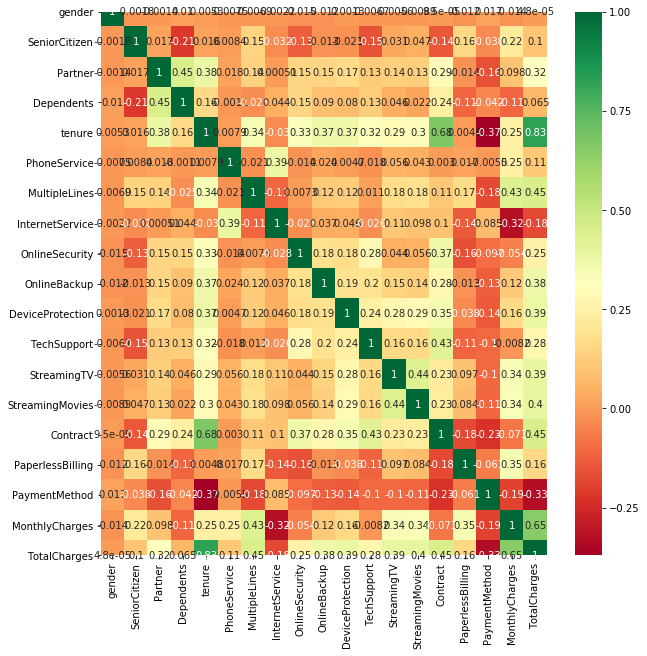

In [17]:
# THE CORRELETION MATRIX

corr=df.corr()
corr_ind=corr.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[corr_ind].corr(), annot=True, cmap='RdYlGn')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A4163F2108>,
      dtype=object)

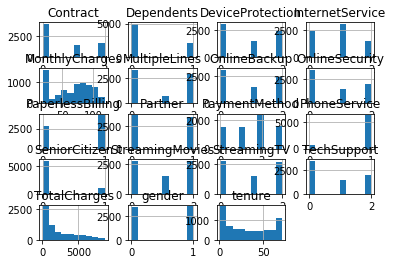

In [18]:
# THE CORRELETION MATRIX | NOT MUCH DEPENDENCIES

df.hist()

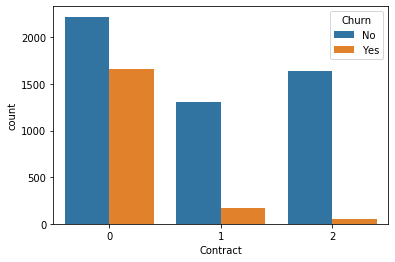

In [19]:
# CONTRACT/CHURN DEPENDENCIES

sns.countplot(x=df['Contract'], hue=df['Churn'] , data=df) 

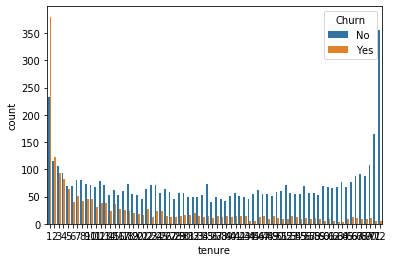

In [20]:
sns.countplot(x=df['tenure'], hue=df['Churn'] , data=df)

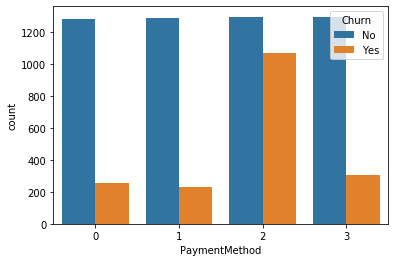

In [21]:
sns.countplot(x=df['PaymentMethod'], hue=df['Churn'] , data=df)

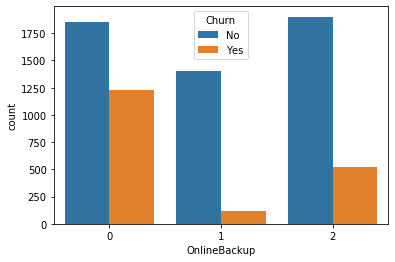

In [22]:
sns.countplot(x=df['OnlineBackup'], hue=df['Churn'] , data=df)

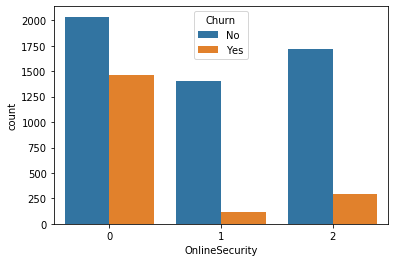

In [23]:
sns.countplot(x=df['OnlineSecurity'], hue=df['Churn'] , data=df)

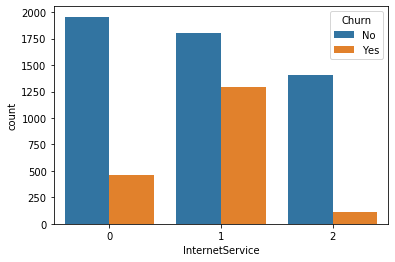

In [24]:
sns.countplot(x=df['InternetService'], hue=df['Churn'] , data=df)

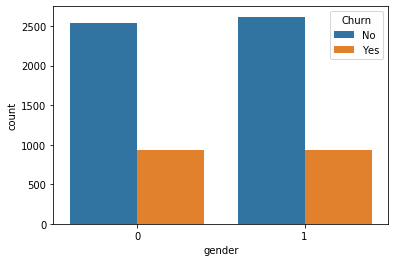

In [25]:
sns.countplot(x=df['gender'], hue=df['Churn'] , data=df)

In [26]:
## THE SENIOR CITIZEN CUSTOMER COLUMN IS IMBALNCE AS THEIR IS VERY LESS NO OF SENIOR CITIZENS.
## LONGER BOND PERIOD CUSTOMER HAS LESS CHANCE OF CHURN BUT MONTHLY CUSTOMER HAS VERY HIGH CHURN RATE
## LOW TENURE CUSTOMERS HAS VERY HIGH CHURN RATIO AS HIGH TENURE PEOPLE HAS VERY LESS TO NO CHURN RATIO
## ELECTRONIC MAIL CUSTOMER HAS HIGH TENDECY OF CHURN
## WHO DOESN'T HAVE ONLINE BAKEUP HAS VERY HIGHER CHARN RATE 
## WHO DOESN'T HAVE ONLINE SECURITY HAS VERY HIGHER CHARN RATE 
## FIBER OPTIC CONNECTED CUSTOMERS HAS VERY HIGH CHURN RATE

# Implement Machine Learning Models

In [27]:
## SPLITTING THE DATA INTO  DEPENDENT ( Y )  & INDEPENDENT ( X ) FEATURES

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.1, random_state=4)


## NORMALIZING THE DATA AS WE HAVE OUTLIERS

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)


from sklearn.metrics import accuracy_score

In [28]:
# GRADIENT-BOOST CLASSIFIER

from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier(random_state=40)

gbc.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=40, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [29]:
# ACUURACY CHECK

y_pred=gbc.predict(x_test)

accuracy_score(y_pred, y_test)

0.8082386363636364

In [30]:
# RANDOM-FOREST CLASSIFIER

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(criterion='entropy', min_samples_leaf=3, random_state=4)

rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=4, verbose=0,
                       warm_start=False)

In [31]:
# ACUURACY CHECK

y_predict=gbc.predict(x_test)

accuracy_score(y_predict, y_test)

0.8082386363636364

In [32]:
# SVC CLASSIFIER

from sklearn.svm import SVC

svc=SVC(random_state=10)

svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=10, shrinking=True, tol=0.001,
    verbose=False)

In [33]:
## ACCURACY CHECK

y_pr=gbc.predict(x_test)

accuracy_score(y_pr, y_test)

0.8082386363636364

In [35]:
###  USING XGBOOST AS THE DATASET IS IMBALANCE



from sklearn.model_selection import RandomizedSearchCV
import xgboost

classifier = xgboost.XGBClassifier()


# MAKING DICT FOR PARAMETERS TO GIVE TO RANDOMIZE-SEARCH-CV


param={
    'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'max_depth' : [3, 4, 5, 6, 8, 10, 12, 15],
    'min_child_weight' : [1, 3, 5, 7],
    'gamma' : [0.0, 0.1, 0.2, 0.3, 0.4], 
    'colsample_bytree' : [0.3, 0.4, 0.5, 0.7]
}

random_search=RandomizedSearchCV(classifier, param_distributions=param, n_iter=3, scoring='roc_auc', n_jobs=-1,cv=5, verbose=3)


In [36]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    5.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=3, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [38]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [39]:
### USING OPTIMIZED  PARAMETERS

classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [40]:
###  ACCURACY CHECK

y_p=classifier.predict(x_test)

accuracy_score(y_p, y_test)

0.7897727272727273

### Model Evaluation

In [60]:
### USING SMOTETOMEK  & RANDOMOVER-SAMPLER OVER-SAMPLING TO PRODUCE SYNTHETIC MINORITY POINTS TO MINIMIZE THE IMBALANCE

#from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler

os=RandomOverSampler(random_state=30)
x_train_, y_train_ = os.fit_sample(x_train, y_train)

In [61]:
### COMPARING PREVIOUS & CURRENT YES/NO VALUES FOR CHURN

from collections import Counter
print("Previously {}".format(Counter(y_train)))
print("After Over-Sampling {}".format(Counter(y_train_)))

Previously Counter({'No': 4647, 'Yes': 1681})
After Over-Sampling Counter({'Yes': 4647, 'No': 4647})


In [65]:
### USING THESE TRAING SET TO XGBOOST CLASSIFIER AFTER HYPERPARAMETER OPTIMIZATION


param={
    'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'max_depth' : [3, 4, 5, 6, 8, 10, 12, 15],
    'min_child_weight' : [1, 3, 5, 7],
    'gamma' : [0.0, 0.1, 0.2, 0.3, 0.4], 
    'colsample_bytree' : [0.3, 0.4, 0.5, 0.7]
}

random_search=RandomizedSearchCV(classifier, param_distributions=param, n_iter=3, scoring='roc_auc', n_jobs=-1,cv=5, verbose=3)

random_search.fit(x_train_,y_train_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    5.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=0.4, gamma=0.3,
                                           learning_rate=0.2, max_delta_step=0,
                                           max_depth=4, min_child_weight=3,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=...
                                           verbosity=1),
                   iid='deprecated', n_iter=3, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.

In [66]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3,
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [68]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3,
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


classifier.fit(x_train_, y_train_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3,
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [70]:
y_prd=classifier.predict(x_test)

accuracy_score(y_prd, y_test)

0.7798295454545454

In [71]:
## RANDOM FOREST USING OVERSAMPLING

rfc.fit(x_train_, y_train_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=4, verbose=0,
                       warm_start=False)

In [72]:
y_prediction=rfc.predict(x_test)

accuracy_score(y_prediction, y_test)

0.7897727272727273

### Final Conclusions

In [ ]:
##  THE CHURN DATASET IS IMBALANCED AS IT HAS VERY LESS NO OF CHURNED CUSTOMER COMPARED TO NON-CHURNED CUSTOMER.
##  THE SENIOR CITIZEN CUSTOMER COLUMN IS IMBALNCE AS THEIR IS VERY LESS NO OF SENIOR CITIZENS.
##  LONGER-BOND  CUSTOMER IS VERY LOYAL TO THE COMPANY BUT MONTHLY CUSTOMERS CHURNS QUITE EASILY.
##  LOW-TENURE CUSTOMERS HAS VERY HIGH CHURN RATE.
##  GENDER HAS ALMOST NO SIGNIFICANCE IN CHURNING AS BOTH MALE & FEMALE HAS SIMILER CHURN RATE
##  HIGH-TENURE CUSTOMERS ARE VERY LOYAL TO THE COMPANY & HAS ALMOST NEGLIGIBLE CHURN RATE
##  ELECTRONIC-MAIL SYSTEM MAY HAVE SOME ISSUE AS THESE PAYMENT METHOD CUSTOMER HAS VERY HIGH TENDENCY OF CHURN
##  CUSTOMER WHO DOESN'T HAVE ONLINE BAKEUP & SECURITY HAS HIGHER CHARN RATE 
##  FIBER OPTIC CONNECTION MAY HAVE SOME ISSUE AS CUSTOMERS USING FIBER-OPTICS CHURNS VERY EASILY

